[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SmilodonCub/DS4VS/blob/master/Week6/DS4VS_week6_EDA.ipynb)

<br>

# Week 6: EDA

<br>

### a Brief Recap:

* Hello, how are you?
* Some changes to the Syllabus: PsychoPy class will become a second day for Visualization
* Today:
    * look over some code to import example 'real world' data files
    * an example of using a function to iterate over data files
    * In the next notebook: data missingness & data cleaning

## EDA

Today we're all about **Exploratory Data Analysis**  

We'll start by looking at **data wrangling** - ways to import and give structure to our data files


### Environmental Dependancies:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import seaborn as sns

### Example Files

* EEG.txt
* ERG.txt
* pupil.txt
* a .mat mystery


### EEG.txt

In [3]:
EEG_url = 'https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/Week6/EEG.txt'
#EEG_df = pd.read_csv( EEG_url )
#EEG_df = pd.read_csv( EEG_url, encoding= 'unicode_escape' )
#EEG_df = pd.read_csv( EEG_url, sep = '\t', encoding= 'unicode_escape' )
EEG_df = pd.read_csv( EEG_url, skiprows = range( 0, 38 ), sep = '\t', encoding= 'unicode_escape'  )
EEG_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Time (ms),Result (nV),Trial (nV),Trial (nV).1,...,Trial (nV).51,Trial (nV).52,Trial (nV).53,Trial (nV).54,Trial (nV).55,Trial (nV).56,Trial (nV).57,Trial (nV).58,Trial (nV).59,Unnamed: 69
0,1.0,7.0,1.0,1.0,8.0,30.0,-200,-2878.0,23117160,19308308,...,-506728,-293424,-295192,-273024,-8984,-172552,185232,336920,-296984,NaN
1,1.0,38.0,2.0,1.0,39.0,30.0,-199,-686.0,23100838,19311116,...,-554952,-463392,-455464,-461344,211024,-247488,5200,189472,-132576,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,-198,-7578.5,23106506,19303496,...,-462680,-511104,-462904,-502040,285656,-305192,-117336,28904,-13320,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,-197,-11692.0,23097556,19292548,...,-322216,-483960,-369408,-464024,242552,-451264,-174992,-93304,41632,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,-196,-8942.0,23116120,19298750,...,-166416,-365632,-248976,-347248,68024,-474760,-234848,-174904,124464,NaN


# Read in the file
with open('file.txt', 'r') as file :
  filedata = file.read()

# Replace the target string
filedata = filedata.replace('ram', 'abcd')

# Write the file out again
with open('file.txt', 'w') as file:
  file.write(filedata)

In [4]:
EEG_df.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Time (ms),Result (nV),Trial (nV),Trial (nV).1,...,Trial (nV).51,Trial (nV).52,Trial (nV).53,Trial (nV).54,Trial (nV).55,Trial (nV).56,Trial (nV).57,Trial (nV).58,Trial (nV).59,Unnamed: 69
30195,NaN,NaN,NaN,NaN,NaN,NaN,29995,-1117390.0,20474508,17699092,...,-480480,-211392,-423624,-264664,203192,-50392,18040,-107400,86528,NaN
30196,NaN,NaN,NaN,NaN,NaN,NaN,29996,-1115651.5,20488904,17692340,...,-509640,-85792,-297216,-317224,25040,-184952,62440,17736,313624,NaN
30197,NaN,NaN,NaN,NaN,NaN,NaN,29997,-1116084.0,20492312,17686822,...,-425568,-24760,-148480,-439480,-121088,-244824,197288,82896,357448,NaN
30198,NaN,NaN,NaN,NaN,NaN,NaN,29998,-1113219.5,20491852,17686376,...,-272864,77808,-58752,-510536,-169208,-286744,329208,137392,310944,NaN
30199,NaN,NaN,NaN,NaN,NaN,NaN,29999,-1112654.5,20487272,17692484,...,-140360,203104,23312,-472712,-236896,-467016,353256,332752,190704,NaN


#### Further formatting necessary

`usecols` to specify which '\t' delineated columns from the .txt file to access

In [5]:
EEG_df = pd.read_csv( EEG_url, skiprows = range( 0, 38 ), sep = '\t', usecols = range( 6, 69 ) )
EEG_df.head()

,Time (ms),Result (nV),Trial (nV),Trial (nV).1,Trial (nV).2,Trial (nV).3,Trial (nV).4,Trial (nV).5,Trial (nV).6,Trial (nV).7,...,Trial (nV).50,Trial (nV).51,Trial (nV).52,Trial (nV).53,Trial (nV).54,Trial (nV).55,Trial (nV).56,Trial (nV).57,Trial (nV).58,Trial (nV).59
0,-200,-2878.0,23117160,19308308,16989774,12286565.0,3628960.50,-7953080,-13963474,-22426948,...,254544,-506728,-293424,-295192,-273024,-8984,-172552,185232,336920,-296984
1,-199,-686.0,23100838,19311116,16996262,12297556.0,3633316.75,-7946816,-13964136,-22429020,...,83808,-554952,-463392,-455464,-461344,211024,-247488,5200,189472,-132576
2,-198,-7578.5,23106506,19303496,16997828,12299048.0,3637266.25,-7942174,-13973556,-22437508,...,-62712,-462680,-511104,-462904,-502040,285656,-305192,-117336,28904,-13320
3,-197,-11692.0,23097556,19292548,16991610,12301900.0,3636963.75,-7948777,-13983448,-22435202,...,-164936,-322216,-483960,-369408,-464024,242552,-451264,-174992,-93304,41632
4,-196,-8942.0,23116120,19298750,16987192,12296530.0,3625909.00,-7953270,-13979670,-22439148,...,-230224,-166416,-365632,-248976,-347248,68024,-474760,-234848,-174904,124464


In [6]:
EEG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time (ms)      30200 non-null  int64  
 1   Result (nV)    30200 non-null  float64
 2   Trial (nV)     30200 non-null  int64  
 3   Trial (nV).1   30200 non-null  int64  
 4   Trial (nV).2   30200 non-null  int64  
 5   Trial (nV).3   30200 non-null  float64
 6   Trial (nV).4   30200 non-null  float64
 7   Trial (nV).5   30200 non-null  int64  
 8   Trial (nV).6   30200 non-null  int64  
 9   Trial (nV).7   30200 non-null  int64  
 10  Trial (nV).8   30200 non-null  int64  
 11  Trial (nV).9   30200 non-null  int64  
 12  Trial (nV).10  30200 non-null  int64  
 13  Trial (nV).11  30200 non-null  int64  
 14  Trial (nV).12  30200 non-null  int64  
 15  Trial (nV).13  30200 non-null  int64  
 16  Trial (nV).14  30200 non-null  float64
 17  Trial (nV).15  30200 non-null  float64
 18  Trial 

#### Quick & dirty visualization

Just take a quick peak at one of the channels...  
...Is this what we expect to see?

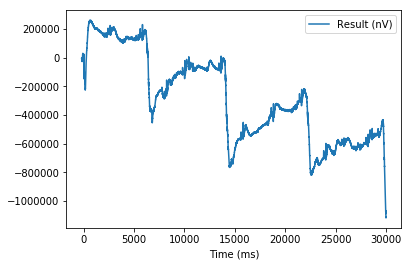

In [7]:
EEG_df.plot(  x = 'Time (ms)', y = 'Result (nV)' ) 
plt.show()

### ERG.txt

In [11]:
ERG_url = 'https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/Week6/ERG.txt'
ERG_df = pd.read_csv( ERG_url, sep = '\t', 
                     usecols = range( 44, 77 ), 
                     encoding= 'unicode_escape',
                     header = None)
print( ERG_df.columns )
ERG_df.head()

Int64Index([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
            61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76],
           dtype='int64')


,44,45,46,47,48,49,50,51,52,53,...,67,68,69,70,71,72,73,74,75,76
0,-9.988901,1193.444092,3523.546387,-9.988901,-248.565338,-318.016846,-9.988901,668.871460,6401.297363,-9.988901,...,-5642.831543,-9.988901,1229.556519,12728.140625,-9.988901,969.740112,3793.472656,-9.988901,-1180.133423,9796.137695
1,-9.433962,1542.790649,-2461.138184,-9.433962,-759.616272,-4025.416992,-9.433962,767.126953,8420.022461,-9.433962,...,-6953.375000,-9.433962,451.992188,14822.474609,-9.433962,1690.635742,1037.911011,-9.433962,-1156.181030,14066.305664
2,-8.879023,1252.137207,-7629.822754,-8.879023,-1238.667236,-6628.816895,-8.879023,549.382446,8654.748047,-8.879023,...,-5119.918945,-8.879023,-661.572144,13236.807617,-8.879023,2265.531250,-2957.650391,-8.879023,-971.228638,15664.472656
3,-8.324084,657.483643,-8438.507812,-8.324084,-1641.718140,-7440.217285,-8.324084,219.637909,7697.472656,-8.324084,...,-2918.462402,-8.324084,-1075.136597,10323.140625,-8.324084,2605.427002,-7353.211914,-8.324084,-862.276245,15822.640625
4,-7.769146,54.830200,-7527.192383,-7.769146,-1996.769043,-5099.617188,-7.769146,-138.106628,7356.197754,-7.769146,...,-1101.005859,-7.769146,-674.700928,6217.474609,-7.769146,2839.322754,-11428.773438,-7.769146,-1079.323853,15580.807617


In [12]:
chan_names = [ 'chan_{}'.format( x ) for x in range( 0, 33 ) ]
ERG_df.columns = chan_names
ERG_df.head()

,chan_0,chan_1,chan_2,chan_3,chan_4,chan_5,chan_6,chan_7,chan_8,chan_9,...,chan_23,chan_24,chan_25,chan_26,chan_27,chan_28,chan_29,chan_30,chan_31,chan_32
0,-9.988901,1193.444092,3523.546387,-9.988901,-248.565338,-318.016846,-9.988901,668.871460,6401.297363,-9.988901,...,-5642.831543,-9.988901,1229.556519,12728.140625,-9.988901,969.740112,3793.472656,-9.988901,-1180.133423,9796.137695
1,-9.433962,1542.790649,-2461.138184,-9.433962,-759.616272,-4025.416992,-9.433962,767.126953,8420.022461,-9.433962,...,-6953.375000,-9.433962,451.992188,14822.474609,-9.433962,1690.635742,1037.911011,-9.433962,-1156.181030,14066.305664
2,-8.879023,1252.137207,-7629.822754,-8.879023,-1238.667236,-6628.816895,-8.879023,549.382446,8654.748047,-8.879023,...,-5119.918945,-8.879023,-661.572144,13236.807617,-8.879023,2265.531250,-2957.650391,-8.879023,-971.228638,15664.472656
3,-8.324084,657.483643,-8438.507812,-8.324084,-1641.718140,-7440.217285,-8.324084,219.637909,7697.472656,-8.324084,...,-2918.462402,-8.324084,-1075.136597,10323.140625,-8.324084,2605.427002,-7353.211914,-8.324084,-862.276245,15822.640625
4,-7.769146,54.830200,-7527.192383,-7.769146,-1996.769043,-5099.617188,-7.769146,-138.106628,7356.197754,-7.769146,...,-1101.005859,-7.769146,-674.700928,6217.474609,-7.769146,2839.322754,-11428.773438,-7.769146,-1079.323853,15580.807617


(1099, 33)


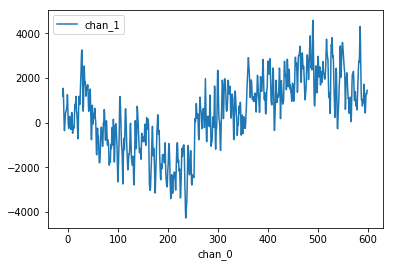

In [13]:
print( ERG_df.shape )
ERG_df.plot( x = 'chan_0', y = 'chan_1' ) 
plt.show()

#### A Pattern Emerges...

Glancing at the data we can see a pattern in the columns: time, dataX, dataY  
I'm giving the data columns two arbitrary names here; we'll need info from our domain expert.  

Let's rename the columns...

In [16]:
colnames = [ ['time_{}'.format(x), 'chan_X_{}'.format(x), 'chan_Y_{}'.format(x)] for x in range( 0, int( ERG_df.shape[1] /3 ) ) ]
#print( colnames)
colnames = [item for sublist in colnames for item in sublist]
#print( colnames)
#colnames

In [17]:
#change the column names
ERG_df.columns = colnames
ERG_df.head()

,time_0,chan_X_0,chan_Y_0,time_1,chan_X_1,chan_Y_1,time_2,chan_X_2,chan_Y_2,time_3,...,chan_Y_7,time_8,chan_X_8,chan_Y_8,time_9,chan_X_9,chan_Y_9,time_10,chan_X_10,chan_Y_10
0,-9.988901,1193.444092,3523.546387,-9.988901,-248.565338,-318.016846,-9.988901,668.871460,6401.297363,-9.988901,...,-5642.831543,-9.988901,1229.556519,12728.140625,-9.988901,969.740112,3793.472656,-9.988901,-1180.133423,9796.137695
1,-9.433962,1542.790649,-2461.138184,-9.433962,-759.616272,-4025.416992,-9.433962,767.126953,8420.022461,-9.433962,...,-6953.375000,-9.433962,451.992188,14822.474609,-9.433962,1690.635742,1037.911011,-9.433962,-1156.181030,14066.305664
2,-8.879023,1252.137207,-7629.822754,-8.879023,-1238.667236,-6628.816895,-8.879023,549.382446,8654.748047,-8.879023,...,-5119.918945,-8.879023,-661.572144,13236.807617,-8.879023,2265.531250,-2957.650391,-8.879023,-971.228638,15664.472656
3,-8.324084,657.483643,-8438.507812,-8.324084,-1641.718140,-7440.217285,-8.324084,219.637909,7697.472656,-8.324084,...,-2918.462402,-8.324084,-1075.136597,10323.140625,-8.324084,2605.427002,-7353.211914,-8.324084,-862.276245,15822.640625
4,-7.769146,54.830200,-7527.192383,-7.769146,-1996.769043,-5099.617188,-7.769146,-138.106628,7356.197754,-7.769146,...,-1101.005859,-7.769146,-674.700928,6217.474609,-7.769146,2839.322754,-11428.773438,-7.769146,-1079.323853,15580.807617


Alternatively, we could check to see if the columns are identical. if so, drop the duplicates.  

In [18]:
ERG_df['time_0'].equals( ERG_df['time_1'] )

True

#### A Quick and dirty visualization

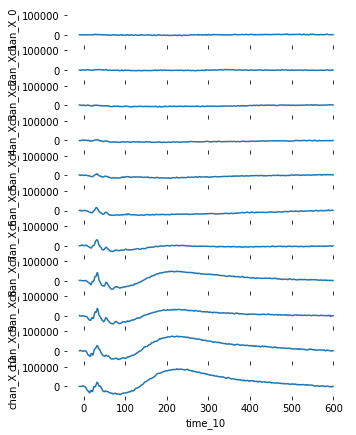

In [19]:
plt.subplots(figsize=(5, 7))
for idx in range(1,12):
    time_str = 'time_{}'.format(idx-1)
    X_str = 'chan_X_{}'.format(idx-1)
    Y_str = 'chan_Y_{}'.format(idx-1)
    plt.subplot(11,1,idx)
    sns.lineplot( data = ERG_df, x= time_str, y= X_str )
    plt.ylim( -50000, 100000 )
    
sns.despine(left=True, bottom=True, right=True)
plt.show()

### pupil.txt

In [23]:
pupil_url = 'https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/Week6/pupil.txt'
pupil_df = pd.read_csv( pupil_url, sep = '\t' )
pupil_df.head() 

,time,marker,pupilArea,pupilDiam,pupilDiam_mm,centroid.x,centroid.y,rect.w,rect.h,huMoments[0]
0,0.000000,0,12484,126.076,6.19690,247,98,150,105,0.169599
1,0.033333,0,12484,126.076,6.19690,247,98,150,105,0.169599
2,0.066667,0,12722,127.272,6.25569,247,98,153,107,0.171040
3,0.100000,0,12722,127.272,6.25569,247,98,153,107,0.171040
4,0.133333,0,12943,128.373,6.30979,247,98,154,112,0.171405


In [21]:
pupil_df.tail()

,time,marker,pupilArea,pupilDiam,pupilDiam_mm,centroid.x,centroid.y,rect.w,rect.h,huMoments[0]
858,28.6000,0,4718,77.5058,3.80957,261,91,94,65,0.170537
859,28.6333,0,4611,76.6219,3.76613,261,91,92,65,0.169665
860,28.6667,0,4611,76.6219,3.76613,261,91,92,65,0.169668
861,28.7000,0,4611,76.6219,3.76613,261,91,92,65,0.169668
862,28.7333,0,4531,75.9543,3.73331,261,91,92,64,0.170146


In [26]:
print( pupil_df.shape )
pupil_df.info()
pupil_df.describe()

(863, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          863 non-null    float64
 1   marker        863 non-null    int64  
 2   pupilArea     863 non-null    int64  
 3   pupilDiam     854 non-null    float64
 4   pupilDiam_mm  863 non-null    float64
 5   centroid.x    863 non-null    int64  
 6   centroid.y    863 non-null    int64  
 7   rect.w        863 non-null    int64  
 8   rect.h        863 non-null    int64  
 9   huMoments[0]  863 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 67.5 KB


,time,marker,pupilArea,pupilDiam,pupilDiam_mm,centroid.x,centroid.y,rect.w,rect.h,huMoments[0]
count,863.000000,863.000000,863.000000,854.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,14.366667,0.011587,7103.892236,81.506821,4.136948,252.917729,92.738123,96.844728,67.666280,0.172668
std,8.309031,0.107082,11684.091150,34.236041,2.177885,5.588474,6.121244,42.129251,30.892296,0.010548
min,0.000000,0.000000,1340.000000,41.305500,2.030250,245.000000,83.000000,0.000000,0.000000,0.166086
25%,7.183335,0.000000,2003.000000,50.349000,2.482210,250.000000,89.000000,59.000000,40.000000,0.170093
50%,14.366700,0.000000,4351.000000,74.327600,3.658410,252.000000,91.000000,90.000000,62.000000,0.171427
75%,21.550000,0.000000,13208.000000,128.388000,6.374060,255.000000,100.000000,154.000000,110.000000,0.173134
max,28.733300,1.000000,128356.000000,140.537000,19.870400,300.000000,109.000000,169.000000,121.000000,0.309235


#### A Quick & dirty visualization

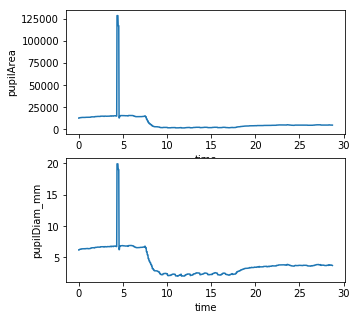

In [30]:
plt.subplots(figsize=(5, 5))
plt.subplot(2,1,1)
sns.lineplot( data = pupil_df, x= 'time', y= 'pupilArea' )
plt.subplot(2,1,2)
sns.lineplot( data = pupil_df, x= 'time', y= 'pupilDiam_mm' )
plt.show()

### MATLAB struct


In [31]:
path = '/home/bonzilla/Documents/ScienceLife/DS4VS/Week6/sampledata.mat'

mat_dat = scipy.io.loadmat(path)
print( type( mat_dat ) )
print( mat_dat.keys() )

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'sampledata'])


Let's start by investigating the keys...

In [32]:
print( mat_dat['__header__'] )
print( mat_dat['__version__'] )
print( mat_dat['__globals__'] )
EEGmat = mat_dat['sampledata']
EEGmat.shape

b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep 16 10:04:25 2021'
1.0
[]


(1, 1)

In [ ]:
EEGmat

It looks like the dunders are all file metadata. Not relevant? (let's ask our expert)  
We are mainly concerned with formatting the data in `sampledata`  

`mat_dat['sampledata']` is a deeply nested structure... 

In [44]:
mat_dat['sampledata'][0][0][4]

array([[20]], dtype=uint8)

In [45]:
# sampledata.channels
channels = mat_dat['sampledata'][0][0][0][0]
channel_list = [ chan_num[0][0] for chan_num in channels ]
channel_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [47]:
# sampledata.fielname
filename = mat_dat['sampledata'][0][0][1][0]
filename

'test.plx'

In [46]:
# sampledata.maps
mat_dat['sampledata'][0][0][2][0,2].shape

(10, 10, 100)

In [48]:
# sampledata.psth_range
psth_range = mat_dat['sampledata'][0][0][3]
print( psth_range.shape )
print( type( psth_range ) )
psth_range

(1, 100)
<class 'numpy.ndarray'>


array([[0.11143357, 0.02194786, 0.1330176 , 0.49309298, 0.01292437,
        0.13135294, 0.77181088, 0.21172413, 0.53136121, 0.39345179,
        0.0260582 , 0.57885712, 0.84462307, 0.0568424 , 0.86503733,
        0.11746078, 0.06310518, 0.75519303, 0.72688161, 0.24512654,
        0.29241728, 0.23990784, 0.57013698, 0.85669324, 0.8992415 ,
        0.73317643, 0.4031953 , 0.23646792, 0.61447903, 0.01885815,
        0.46442915, 0.99772184, 0.82322806, 0.01633654, 0.30820984,
        0.31384164, 0.66289322, 0.05008256, 0.08176819, 0.60709556,
        0.74626656, 0.91660945, 0.3639499 , 0.56093799, 0.23618602,
        0.78954256, 0.36813625, 0.88949051, 0.69333997, 0.26970144,
        0.23069869, 0.51044892, 0.17999092, 0.16032351, 0.42505891,
        0.17547089, 0.24111046, 0.24780441, 0.68399919, 0.11694072,
        0.52136042, 0.47993031, 0.18518422, 0.6262399 , 0.39017173,
        0.72416853, 0.67766745, 0.66900668, 0.47502374, 0.78840947,
        0.30436112, 0.10739591, 0.43437242, 0.89

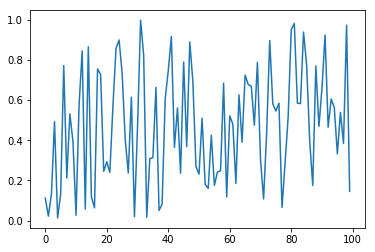

In [49]:
plt.plot( psth_range[0] ) 
plt.show()

In [50]:
# sampledata.n_channels
n_channels = mat_dat['sampledata'][0][0][4][0][0]
n_channels
# QUESTION FOR FARZANEH: why is n_channel 20, but the 'channel' field only lists 16?

20

## Data Wrangling

<img src="data_preprocessing.jpg" width="30%" style="margin-left:auto; margin-right:auto">


## Example Data Import

1. create code to import the data in a managable format
2. functionalize import code
3. apply function the multiple files

### 1. Create code to import/format data

We just saw several example of this above, here's one more!  
The following code will bring in select values from a .txt file.  
This .txt file is one of many for a psychophysical experiment

In [1]:
addy = '/home/bonzilla/Documents/ScienceLife/DS4VS/datasets/gratvernier/mj gratvernier 49.txt'
lines = []
fp = open(addy)
for line in fp:
    lines.append( line )
    print( line )

fp.close()
#print( lines )

EXPERIMENT PARAMETERS:



3/14/2011	10:27:01 AM to 10:30:22 AM

mj

Eye Tested: Right

Spatial Frequency (cycles/degree): 0.4

Drift Velocity: 2

Distance between stimuli (deg): 1.5

Stimuli Eccentricity (deg): 0

Viewing Distance (mm): 480

Temporal Envelope Type: RaisedCosine

   Attack/Decay Time (msec): 10

Trial Duration (msec): 120

Maximum Number of Reversals: 12

Number of Staircases: 2

Interval between free trials: 10000

Type of Vernier: InPhase

Maximal Red, Green, Blue Gun settings are 1.0, 1.0, 1.0



STIMULUS 1:

   Contrast Level: 100

   Color Min: Red: 0  Green: 210  Blue: 0

   Color Max: Red: 700  Green: 0  Blue: 0

   Size (deg):  X: 5  Y: 25

STIMULUS 2:

   Contrast Level: 100

   Color Min: Red: 0  Green: 210  Blue: 0

   Color Max: Red: 700  Green: 0  Blue: 0

   Size (deg):  X: 5  Y: 25

BACKGROUND:

   Red: 350  Green: 105  Blue: 0

   Size (deg):  X: 45  Y: 30



STAIRCASES:



Results for Staircase 1

Experiment termination type 1: Normal termination

Drift

### what to do with a list of lines?

We now need to write code to pull out information based on known patterns in the .txt file format

In [53]:
# length of our list of lines
print( len( lines ) )
print( lines[0:32] )

205
['EXPERIMENT PARAMETERS:\n', '\n', '3/14/2011\t10:27:01 AM to 10:30:22 AM\n', 'mj\n', 'Eye Tested: Right\n', 'Spatial Frequency (cycles/degree): 0.4\n', 'Drift Velocity: 2\n', 'Distance between stimuli (deg): 1.5\n', 'Stimuli Eccentricity (deg): 0\n', 'Viewing Distance (mm): 480\n', 'Temporal Envelope Type: RaisedCosine\n', '   Attack/Decay Time (msec): 10\n', 'Trial Duration (msec): 120\n', 'Maximum Number of Reversals: 12\n', 'Number of Staircases: 2\n', 'Interval between free trials: 10000\n', 'Type of Vernier: InPhase\n', 'Maximal Red, Green, Blue Gun settings are 1.0, 1.0, 1.0\n', '\n', 'STIMULUS 1:\n', '   Contrast Level: 100\n', '   Color Min: Red: 0  Green: 210  Blue: 0\n', '   Color Max: Red: 700  Green: 0  Blue: 0\n', '   Size (deg):  X: 5  Y: 25\n', 'STIMULUS 2:\n', '   Contrast Level: 100\n', '   Color Min: Red: 0  Green: 210  Blue: 0\n', '   Color Max: Red: 700  Green: 0  Blue: 0\n', '   Size (deg):  X: 5  Y: 25\n', 'BACKGROUND:\n', '   Red: 350  Green: 105  Blue: 0\n'

### information dictionary

* subject and stimulus information is given in the extensive header of this file.  
* lines 1 to ~32 are the same across all files, so we can use that to our advantange to pull the information we need  
* We will store fields of interest in a Python dictionary...

In [55]:
lines[2].split('\t')

['3/14/2011', '10:27:01 AM to 10:30:22 AM\n']

In [56]:
# initialize a python dictionary
verniergrat_dict = {}

# add a few fields
verniergrat_dict['date'] = lines[2].split()[0]
verniergrat_dict['subject'] = lines[3][0:2]
verniergrat_dict['spac_freq'] = lines[5].split()[3]
verniergrat_dict['drift vel'] = lines[6].split()[2] 
verniergrat_dict['grat_gap'] = lines[7].split()[4]
verniergrat_dict['eccentricity'] = lines[5].split()[3]
verniergrat_dict['spac_freq'] = lines[5].split()[3]

print( verniergrat_dict )

{'date': '3/14/2011', 'subject': 'mj', 'spac_freq': '0.4', 'drift vel': '2', 'grat_gap': '1.5', 'eccentricity': '0.4'}


### 2. Functionalize the import/format code

The dictionary doesn't hold all the information we'd need for analysis, but it's a good start.  
Let's functionalize the code:

In [3]:
def gratvernier_txt2dict( path, filename ):
    """
    helper function to extract data and task metadata from a BBL .txt file
    """
    # read lines into python environment
    file_add = path + filename
    lines = []
    fp = open(file_add)
    for line in fp:
        lines.append( line )
    fp.close()
    
    # pull info of interest and store as a python dictionary
    verniergrat_dict = {}
    
    verniergrat_dict['filename'] = filename
    verniergrat_dict['date'] = lines[2].split()[0]
    verniergrat_dict['subject'] = lines[3][0:2]
    verniergrat_dict['spac_freq'] = lines[5].split()[3]
    verniergrat_dict['drift vel'] = lines[6].split()[2]
    verniergrat_dict['grat_gap'] = lines[7].split()[4]
    verniergrat_dict['eccentricity'] = lines[5].split()[3]
    verniergrat_dict['spac_freq'] = lines[5].split()[3]
    
    # return the data dictionary
    return verniergrat_dict

### take this function for a test drive: 

In [4]:
path = '/home/bonzilla/Documents/ScienceLife/DS4VS/datasets/gratvernier/'
filename = 'mj gratvernier 49.txt'

exp1 = gratvernier_txt2dict( path, filename )
print( exp1 )
print( type( exp1 ) )
print( exp1.keys() )

{'filename': 'mj gratvernier 49.txt', 'date': '3/14/2011', 'subject': 'mj', 'spac_freq': '0.4', 'drift vel': '2', 'grat_gap': '1.5', 'eccentricity': '0.4'}
<class 'dict'>
dict_keys(['filename', 'date', 'subject', 'spac_freq', 'drift vel', 'grat_gap', 'eccentricity'])


## Now you try.....

* functionalize some of the code from a previous example
* write a function that will read a file and return some structured data

a basic outline:  

    def basic_dataread( str_path ):
        """
        write a blurb to describe what this function will do
        """
        path = "......." # provide the path where your file lives
        
        # use the appropriate function to read the file
        
        # write code to format/select data of interest
        
        return <data_object>

### iterating over many files

We would like to use our function to iterate over many files and extract information

In [7]:
# how many files are in the folder? 
folder = '/home/bonzilla/Documents/ScienceLife/DS4VS/datasets/gratvernier/'

import os
files = os.listdir( folder ) 
print( len( files ) )
print( files )

59
['mj gratvernier 97.txt', 'mj gratvernier 53.txt', 'mj gratvernier 90.txt', 'mj gratvernier 58.txt', 'mj gratvernier 49.txt', 'mj gratvernier 62.txt', 'mj gratvernier 74.txt', 'mj gratvernier 82.txt', 'mj gratvernier 59.txt', 'mj gratvernier 96.txt', 'mj gratvernier 75.txt', 'mj gratvernier 100.txt', 'mj gratvernier 91.txt', 'mj gratvernier 71.txt', 'mj gratvernier 54.txt', 'mj gratvernier 77.txt', 'mj gratvernier 99.txt', 'mj gratvernier 57.txt', 'mj gratvernier 78.txt', 'mj gratvernier 70.txt', 'mj gratvernier 104.txt', 'mj gratvernier 69.txt', 'mj gratvernier 98.txt', 'mj gratvernier 67.txt', 'mj gratvernier 95.txt', 'mj gratvernier 93.txt', 'mj gratvernier 92.txt', 'mj gratvernier 102.txt', 'mj gratvernier 81.txt', 'mj gratvernier 76.txt', 'mj gratvernier 94.txt', 'mj gratvernier 65.txt', 'mj gratvernier 88.txt', 'mj gratvernier 103.txt', 'mj gratvernier 68.txt', 'mj gratvernier 63.txt', 'mj gratvernier 55.txt', 'mj gratvernier 60.txt', 'mj gratvernier 80.txt', 'mj gratvernier 5

### iterating over many files

There are 59 .txt files in the same directory as our working example.  
It wouldn't be impossible to manually work through them with cut/paste, but our time is more valuable than that!!!  

Let's have Python do the work for us...

In [61]:
for file in files: 
    file_path = '/home/bonzilla/Documents/ScienceLife/DS4VS/datasets/gratvernier/'
    res = gratvernier_txt2dict( file_path, file )
    print( file )
    print( res )

mj gratvernier 97.txt
{'filename': 'mj gratvernier 97.txt', 'date': '3/21/2011', 'subject': 'mj', 'spac_freq': '0.4', 'drift vel': '2', 'grat_gap': '0.5', 'eccentricity': '0.4'}
mj gratvernier 53.txt
{'filename': 'mj gratvernier 53.txt', 'date': '3/14/2011', 'subject': 'mj', 'spac_freq': '0.4', 'drift vel': '2', 'grat_gap': '0.5', 'eccentricity': '0.4'}
mj gratvernier 90.txt
{'filename': 'mj gratvernier 90.txt', 'date': '3/17/2011', 'subject': 'mj', 'spac_freq': '0.4', 'drift vel': '2', 'grat_gap': '0', 'eccentricity': '0.4'}
mj gratvernier 58.txt
{'filename': 'mj gratvernier 58.txt', 'date': '3/14/2011', 'subject': 'mj', 'spac_freq': '0.4', 'drift vel': '2', 'grat_gap': '0', 'eccentricity': '0.4'}
mj gratvernier 49.txt
{'filename': 'mj gratvernier 49.txt', 'date': '3/14/2011', 'subject': 'mj', 'spac_freq': '0.4', 'drift vel': '2', 'grat_gap': '1.5', 'eccentricity': '0.4'}
mj gratvernier 62.txt
{'filename': 'mj gratvernier 62.txt', 'date': '3/15/2011', 'subject': 'mj', 'spac_freq': '0.

### 3. Iterate over multiple data files

### Consolidate the outcomes as a pandas DataFrame

printing the results is not very useful to us.  
Let's write another function that will consolidate the outcomes from `gratvernier_txt2dict()`:

In [8]:
def gratvernier_text2df( path, extension ):
    """
    given a folder 'path' (str) and file 'extension' (str),
    gratvernier_txt2df() returns a pandas DataFrame that consolidates
    the dict fields from gratvernier_txt2dict()
    """
    # a list of data files to iterate over
    files = os.listdir( path )
    files = [file for file in files if extension in file]
    files = [file for file in files if 'gratvernier' in file]
    data_fields = ['date', 'subject', 
                   'spac_freq', 'drift vel', 
                   'grat_gap', 'eccentricity']
    dict_list = []
    for file in files:
        row = gratvernier_txt2dict( path, file )
        dict_list.append( row )
        
    data_df = pd.DataFrame( dict_list )
    return data_df

### Let's take this function out for a test drive

In [9]:
folder = '/home/bonzilla/Documents/ScienceLife/DS4VS/datasets/gratvernier/'

res = gratvernier_text2df( folder, '.txt' )
res

,filename,date,subject,spac_freq,drift vel,grat_gap,eccentricity
0,mj gratvernier 97.txt,3/21/2011,mj,0.4,2,0.5,0.4
1,mj gratvernier 53.txt,3/14/2011,mj,0.4,2,0.5,0.4
2,mj gratvernier 90.txt,3/17/2011,mj,0.4,2,0,0.4
3,mj gratvernier 58.txt,3/14/2011,mj,0.4,2,0,0.4
4,mj gratvernier 49.txt,3/14/2011,mj,0.4,2,1.5,0.4
5,mj gratvernier 62.txt,3/15/2011,mj,0.4,2,1.5,0.4
6,mj gratvernier 74.txt,3/16/2011,mj,0.4,2,1,0.4
7,mj gratvernier 82.txt,3/17/2011,mj,0.4,2,0.5,0.4
8,mj gratvernier 59.txt,3/14/2011,mj,0.4,2,0.5,0.4
9,mj gratvernier 96.txt,3/21/2011,mj,0.4,2,1.5,0.4


### Are we happy with this result?

Let's get a better view of the DataFrame:

In [74]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      57 non-null     object
 1   date          57 non-null     object
 2   subject       57 non-null     object
 3   spac_freq     57 non-null     object
 4   drift vel     57 non-null     object
 5   grat_gap      57 non-null     object
 6   eccentricity  57 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


### Dtype `object`

Take a moment and look at the DataFrame further...  


<img src="https://internationalnewsagency.org/wp-content/uploads/2020/11/face-with-a-raised-eyebrow-emoji-780x470.jpg" width="60%" style="margin-left:auto; margin-right:auto">

## Let's take a break. When we come back we will talk about cleaning and evaluating data
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">